# Projeto Prático 2

## Redes Neurais - 2020

<img src="https://www.researchgate.net/profile/Germano_Rosa/publication/262747683/figure/fig1/AS:392393250623493@1470565249417/Figura-1-Modelo-de-um-neuronio-perceptron-de-Rosenblatt-Fonte-Adaptado-de-Medeiros.png" width=600px height=200px />

### Elaborado por: 

* Carlos Diego Ferreira
* João Victor de Oliveira
* Luiz Carlos Silva
* Mikael Fonseca

# Descrição Geral do projeto

Está dividido em 3 grandes partes, sendo elas
1. Implementação e treino de um neurônio apenas
2. Testes com diferentes configurações de hiper parâmetros
3. Treino em holdout + medição de desempenho

Este notebook é referente à parte 3

# Sumário:

**1. [Parte 3: Validação Holdout em Problema Não-Linearmente Separável](#id1)** <br>
**2. [Carregar Dataset](#id2)** <br>
**3. [Visualização dos Dados](#id3)** <br>
**4. [Holdout](#id4)** <br>


<a id="id1"></a> <br> 
## **Parte 3: Validação Holdout em Problema Não-Linearmente Separável:** 

Treinamento para um problema não linearmente separável, incluindo visualizações que demonstrem a natureza do dataset, o processo de treinamento e os resultados de predição obtidos pelo neurônio.

<a id="id2"></a> <br> 
## **Carregar Dataset:** 

In [1]:
#imports
import numpy as np
import random
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d

#import perceptron class
from perceptron import Perceptron

In [2]:
# dt = np.dtype([('x1', np.float64), ('x2', np.float64), ('yd', np.float64)])
data = np.fromfile('../data/dataHoldout.txt')

In [3]:
data = data.reshape(data.shape[0]//3, 3)

In [4]:
X = data[:,:-1]
Y = data[:,-1]
print(X.shape, Y.shape)

(800, 2) (800,)


<a id="id3"></a> <br> 
# Visualização dos Dados 

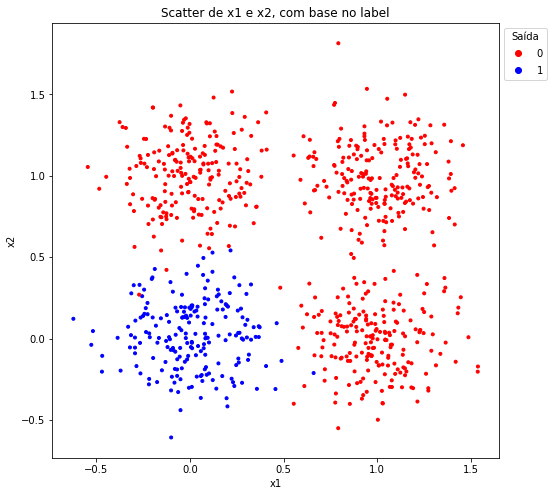

In [5]:
X1 = X[:,0]
X2 = X[:,1]

# def get_line_y(x, c0, c1):
#     return c0 + c1 * x

# c0 = p.weights[0]/p.weights[2]
# c1 = -p.weights[1]/p.weights[2]

# lineX = np.array([X1.min(), X1.max()])
# lineY = np.array([get_line_y(X1.min(), c0, c1), get_line_y(X1.max(), c0, c1)])

binary_cmap = ListedColormap(['red', 'blue'])

fig, ax = plt.subplots(figsize=(8,8))
ax.set(xlabel='x1', ylabel='x2',
       title='Scatter de x1 e x2, com base no label')

scatter = ax.scatter(X1, X2, c=Y, marker=".", cmap=binary_cmap)
# ax.plot(lineX, lineY, color="black", alpha= 0.5)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Saída", bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))


<a id="id4"></a> <br> 
# Holdout

In [6]:
#deve-se implementar uma função que divida os dados em conjunto de treino e de teste.
def holdout_split(X, Y, train_split = 0.7, random_state = 56, shuffle = False):
    s = np.arange(X.shape[0])
    np.random.shuffle(s)
    X = X[s]
    Y = Y[s]
    
    state = np.random.RandomState(random_state)
    arr_rand = state.rand(X.shape[0])
    split = arr_rand < np.percentile(arr_rand, train_split*100)
    x_train = X[split]
    y_train = Y[split]
    x_test =  X[~split]
    y_test = Y[~split]
    return x_train, x_test, y_train, y_test

In [7]:
# X, Y = shuffle(X, Y)
x_train, x_test, y_train, y_test = holdout_split(X, Y, shuffle = True)
print(x_train.shape, x_test.shape)

(560, 2) (240, 2)


<a id="id5"></a> <br> 
# Treinamento

In [8]:
model = Perceptron()
model.fit(x_train, y_train, num_epochs = 100, shuffle = True, learning_rate=0.01, sampling_range = 1)

Pesos iniciais: [ 0.03169407  0.35378241 -0.29178486]
------ Época 1 ------
Novos pesos: [ 0.04169407  0.34740814 -0.2951582 ]
Novos pesos: [ 0.03169407  0.34686089 -0.29627132]
Novos pesos: [ 0.04169407  0.33710998 -0.30481709]
Novos pesos: [ 0.05169407  0.32997517 -0.30471537]
Novos pesos: [ 0.06169407  0.31771827 -0.31542332]
Novos pesos: [ 0.05169407  0.31505301 -0.31569227]
Novos pesos: [ 0.06169407  0.30490631 -0.31610018]
Novos pesos: [ 0.07169407  0.29319226 -0.32531841]
Novos pesos: [ 0.08169407  0.28546962 -0.32556755]
Novos pesos: [ 0.07169407  0.28542216 -0.32458488]
Novos pesos: [ 0.08169407  0.27545754 -0.32516588]
Novos pesos: [ 0.07169407  0.27699471 -0.32245807]
Novos pesos: [ 0.08169407  0.26448994 -0.32408451]
Novos pesos: [ 0.09169407  0.25575757 -0.32512727]
Novos pesos: [ 0.08169407  0.25255453 -0.32567263]
Novos pesos: [ 0.07169407  0.24964217 -0.32457146]
Novos pesos: [ 0.08169407  0.24002226 -0.32469943]
Novos pesos: [ 0.07169407  0.23751938 -0.32331183]
Novos 

Novos pesos: [-0.01830593 -0.04641056 -0.0290122 ]
Novos pesos: [-0.00830593 -0.04514101 -0.03651043]
Novos pesos: [-0.01830593 -0.04146558 -0.03641961]
Novos pesos: [-0.00830593 -0.03662352 -0.04561608]
Novos pesos: [-0.01830593 -0.03449699 -0.04282616]
Novos pesos: [-0.00830593 -0.04003883 -0.03882283]
Novos pesos: [-0.01830593 -0.03800879 -0.0368633 ]
Novos pesos: [-0.00830593 -0.03675647 -0.0410791 ]
Novos pesos: [-0.01830593 -0.03410823 -0.04072675]
Novos pesos: [-0.00830593 -0.04202472 -0.03522148]
Novos pesos: [-0.01830593 -0.03898475 -0.03515692]
Novos pesos: [-0.00830593 -0.03700557 -0.0424647 ]
Novos pesos: [-0.01830593 -0.03619585 -0.03937925]
Novos pesos: [-0.00830593 -0.04622785 -0.03439325]
Novos pesos: [-0.01830593 -0.04410449 -0.03414151]
Novos pesos: [-0.00830593 -0.05021315 -0.03122429]
Novos pesos: [ 0.00169407 -0.04749916 -0.03391905]
Novos pesos: [-0.00830593 -0.04764336 -0.0341936 ]
Novos pesos: [-0.01830593 -0.04666904 -0.03179337]
Novos pesos: [-0.00830593 -0.04

Novos pesos: [-0.02830593 -0.05403725 -0.05214613]
Novos pesos: [-0.01830593 -0.05205807 -0.0594539 ]
Novos pesos: [-0.02830593 -0.04933424 -0.05761796]
Novos pesos: [-0.01830593 -0.04808193 -0.06183377]
Novos pesos: [-0.02830593 -0.04617086 -0.0597279 ]
Novos pesos: [-0.01830593 -0.05641903 -0.05651569]
Novos pesos: [-0.02830593 -0.05544471 -0.05411547]
Novos pesos: [-0.03830593 -0.05280529 -0.05084038]
Novos pesos: [-0.02830593 -0.05025343 -0.05941936]
Novos pesos: [-0.01830593 -0.04753944 -0.06211411]
Novos pesos: [-0.00830593 -0.05533183 -0.05874032]
Novos pesos: [-0.01830593 -0.05336745 -0.05670539]
Novos pesos: [-0.02830593 -0.05354759 -0.05273348]
Novos pesos: [-0.01830593 -0.05908943 -0.04873015]
Novos pesos: [-0.02830593 -0.05445901 -0.0477896 ]
Novos pesos: [-0.03830593 -0.0522915  -0.04237983]
Novos pesos: [-0.02830593 -0.05104246 -0.04970816]
Novos pesos: [-0.01830593 -0.04620041 -0.05890462]
Novos pesos: [-0.00830593 -0.0541169  -0.05339935]
Novos pesos: [-0.01830593 -0.05

Novos pesos: [-0.01830593 -0.03808895 -0.04854034]
Novos pesos: [-0.00830593 -0.04812094 -0.04355434]
Novos pesos: [-0.01830593 -0.04734241 -0.04108241]
Novos pesos: [-0.00830593 -0.04609009 -0.04529821]
Novos pesos: [-0.01830593 -0.04605411 -0.04347655]
Novos pesos: [-0.02830593 -0.04388659 -0.03806678]
Novos pesos: [-0.01830593 -0.05313818 -0.03459477]
Novos pesos: [-0.00830593 -0.05042419 -0.03728953]
Novos pesos: [-0.01830593 -0.04716199 -0.03736023]
Novos pesos: [-0.02830593 -0.04503545 -0.03457032]
Novos pesos: [-0.01830593 -0.03957927 -0.04510299]
Novos pesos: [-0.00830593 -0.04811577 -0.04109187]
Novos pesos: [-0.01830593 -0.04599241 -0.04084013]
Novos pesos: [-0.02830593 -0.04136199 -0.03989959]
Novos pesos: [-0.01830593 -0.03936643 -0.04851896]
Novos pesos: [-0.00830593 -0.04728292 -0.04301369]
Novos pesos: [-0.01830593 -0.04630861 -0.04061346]
Novos pesos: [-0.00830593 -0.04335058 -0.04624005]
Novos pesos: [-0.01830593 -0.04239963 -0.04268501]
Novos pesos: [-0.02830593 -0.03

<a id="id6"></a> <br> 
# Métricas

In [9]:
def confusion_matrix(true, pred):
    cm = np.zeros((2,2))
    for p, t in zip(pred, true):
        cm[int(p)][int(t)] += 1
    return cm

def precision(cm):
    return cm[1][1]/(cm[1][1]+cm[0][1])

def recall(cm):
    return cm[1][1]/(cm[1][1]+cm[1][0])

def f1(precision, recall):
    return 2*precision*recall/(precision+recall)

def accuracy(cm):
    return (cm[1][1] + cm[0][0])/(np.sum(cm))

def metrics_report(y_pred, y_true):
    
    cm = confusion_matrix(y_true, y_pred)
    prec = precision(cm)
    rec = recall(cm)
    print('Matriz de Confusão')
    print(cm)
    print('---------------------------------')
    print('Acurácia: {}'.format(accuracy(cm)))
    print('Precisão: {}'.format(prec))
    print('Recall: {}'.format(rec))
    print('F1-Score: {}'.format(f1(prec, rec)))


In [10]:
y_pred = model.predict(x_test)

<a id="id7"></a> <br>
### Resultados Obtidos

In [11]:
# para conjunto de testes
metrics_report(y_test, y_pred)

Matriz de Confusão
[[171.   0.]
 [ 15.  54.]]
---------------------------------
Acurácia: 0.9375
Precisão: 1.0
Recall: 0.782608695652174
F1-Score: 0.878048780487805


In [12]:
y_pred_train = model.predict(x_train)

In [13]:
#para conjunto de treino
metrics_report(y_train, y_pred_train)

Matriz de Confusão
[[423.   6.]
 [ 14. 117.]]
---------------------------------
Acurácia: 0.9642857142857143
Precisão: 0.9512195121951219
Recall: 0.8931297709923665
F1-Score: 0.9212598425196851


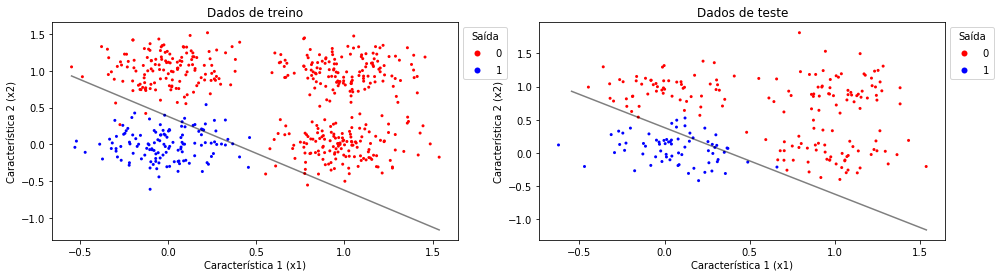

In [14]:
X1 = x_train[:,0]
X2 = x_train[:,1]

def get_line_y(x, c0, c1):
    return c0 + c1 * x

c0 = model.weights[0]/model.weights[2]
c1 = -model.weights[1]/model.weights[2]

lineX = np.array([X1.min(), X1.max()])
lineY = np.array([get_line_y(X1.min(), c0, c1), get_line_y(X1.max(), c0, c1)])

binary_cmap = ListedColormap(['red', 'blue'])

fig, ax = plt.subplots(1, 2, figsize=(16,4))
ax[0].set(xlabel='Característica 1 (x1)', ylabel='Característica 2 (x2)',
       title='Dados de treino')

scatter = ax[0].scatter(X1, X2, c=y_train, marker=".", cmap=binary_cmap, linewidth=0)
ax[0].plot(lineX, lineY, color="black", alpha= 0.5)

legend1 = ax[0].legend(*scatter.legend_elements(),
                    loc="upper left", title="Saída", bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))
X1 = x_test[:,0]
X2 = x_test[:,1]

ax[1].set(xlabel='Característica 1 (x1)', ylabel='Característica 2 (x2)',
       title='Dados de teste')

scatter = ax[1].scatter(X1, X2, c=y_test, marker=".", cmap=binary_cmap, linewidth=0)
ax[1].plot(lineX, lineY, color="black", alpha= 0.5)

legend1 = ax[1].legend(*scatter.legend_elements(),
                    loc="upper left", title="Saída", bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))
